In [57]:
import pandas as pd
import numpy as np
from pathlib import Path
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:

eval_path = Path('.')
cube_count_csvs = eval_path.glob("*/*/*.csv")

dfs = []

for csv in cube_count_csvs:
    participant_id = int(re.search(r"^.*/participant_(\d+).csv$", str(csv)).group(1))
    temp = pd.read_csv(csv)
    temp["scene"] = temp["scene"].str[-1:]
    temp["scene"] = temp["scene"].astype('int')
    temp["participant"] = participant_id
    nvc = "A"
    if int(participant_id) % 2 == 0:
        nvc = "B"
    
    temp["NVC"] = nvc
    dfs.append(temp)
    

df = pd.concat(dfs, axis=0, ignore_index=True)

In [89]:
df.head()

,scene,robot_a,robot_b,participant,NVC
0,0,0,1,1,A
1,1,1,1,1,A
2,2,3,2,1,A
3,3,3,3,1,A
4,4,3,3,1,A


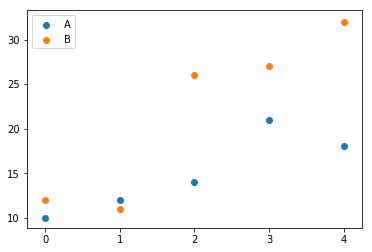

In [88]:
df_temp = df.groupby("scene").sum()
plt.xticks(range(0,5))
plt.scatter(df_temp.index, df_temp["robot_a"], label="A")
plt.scatter(df_temp.index, df_temp["robot_b"], label="B")
plt.legend()

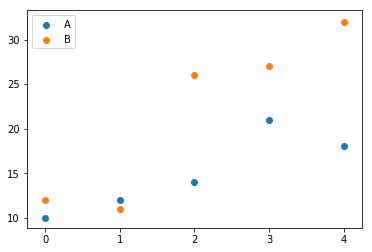

In [102]:
df_temp = df.groupby("scene").sum()
plt.xticks(range(0,5))
plt.scatter(df_temp.index, df_temp["robot_a"], label="A")
plt.scatter(df_temp.index, df_temp["robot_b"], label="B")
plt.legend()

In [93]:
df_nvc = df.groupby("NVC")
# plt.xticks(range(0,5))
# plt.scatter(df_temp.index, df_temp["robot_a"], label="A")
# plt.scatter(df_temp.index, df_temp["robot_b"], label="B")
# plt.legend()

df_nvc

In [103]:
y_nvc = df[df["NVC"] == "A"].groupby("scene").sum()["robot_a"]
y_still = df[df["NVC"] == "B"].groupby("scene").sum()["robot_b"]
index = list(range(0,5))

In [106]:
y_nvc

scene
0     5
1     6
2     9
3    15
4     9
Name: robot_a, dtype: int64

In [107]:
y_still

scene
0     5
1     3
2    14
3    15
4    14
Name: robot_b, dtype: int64

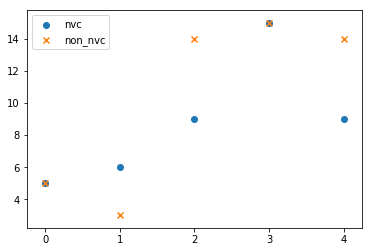

In [109]:
plt.xticks(range(0,5))
plt.scatter(index, y_nvc, label="nvc")
plt.scatter(index, y_still, label="non_nvc", marker="x")
plt.legend()

In [105]:
df[df["NVC"] == "B"]

,scene,robot_a,robot_b,participant,NVC
5,0,1,1,2,B
6,1,2,1,2,B
7,2,2,2,2,B
8,3,0,3,2,B
9,4,4,2,2,B
15,0,2,2,4,B
16,1,0,2,4,B
17,2,2,2,4,B
18,3,3,3,4,B
19,4,2,2,4,B


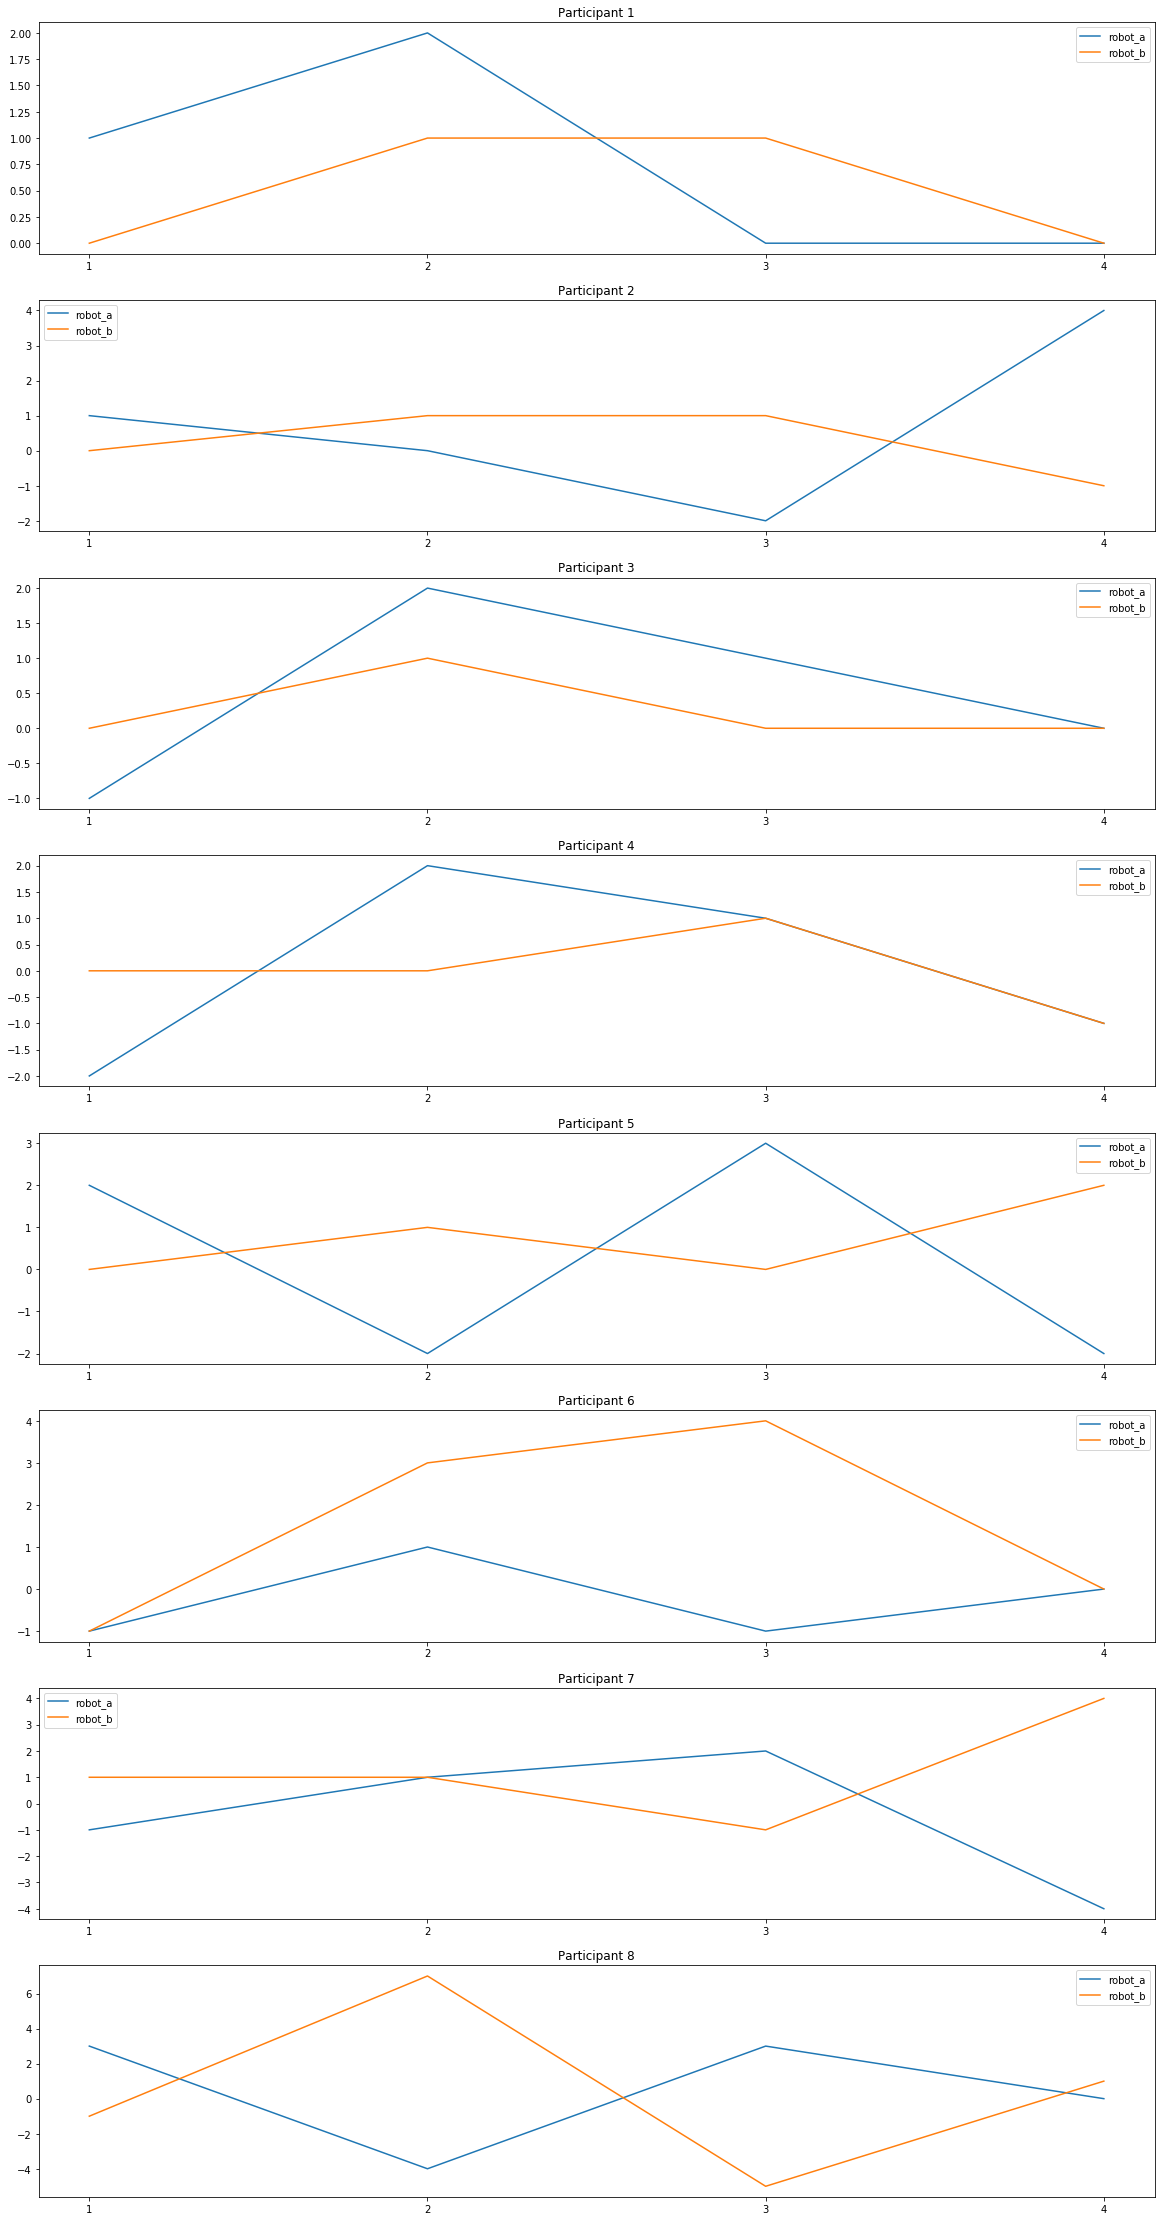

In [130]:
fig, ax =  plt.subplots(8, figsize=(20,40))
plt.setp(ax, xticks=range(0,5))
for participant_id in df["participant"].unique():
    df_participant = df[df["participant"] == participant_id]
    count_diff_a = df_participant["robot_a"].diff()
    count_diff_b = df_participant["robot_b"].diff()
    axes =  ax[participant_id-1]
    axes.plot(index, count_diff_a)
    axes.plot(index, count_diff_b)
    axes.legend()
    axes.set_title("Participant {}".format(participant_id))
    